<a href="https://colab.research.google.com/github/princeKike27/Titanic-Survival/blob/main/Titanic_Survival.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Titanic Survival

For this project I will create a Logistic Regression model that predicts which passengers survived the sinking of the Titanic, based on features like age and class. The RMS Titanic set sail on its maiden voyage in 1912, crossing the Atlantic from Southampton, England to New York City. The ship never completed the voyage, 
sinking to the bottom of the Atlantic Ocean after hitting an iceberg, bringing down 1,502 of 2,224 passengers onboard.

In [ ]:
# import modules

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# load data
df = pd.read_csv('https://raw.githubusercontent.com/princeKike27/Titanic-Survival/main/titanic.csv', delimiter=';')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,712.833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.925,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.05,NaN,S


Columns Description

- Suvived: 0=No & 1=Yes
- Pclass: Ticket Class (1=1st, 2=2nd, 3=3rd)
- Sex: sex
- Age: age in years
- SibSp: # of siblings / spouses aboard the titanic
- Parch: # of parents / children aboard the titanic
- Ticket: ticket number
- Fare: passanger fare
- Cabin: cabin number
- Embarked: port of embarkation (C=Cherbourg, Q=Queenstown, S=Southhampton

# Data Cleaning, Tidying & Standarization

In [ ]:
# check shape of df
df.shape

(1309, 12)

In [ ]:
# check column types
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare            object
Cabin           object
Embarked        object
dtype: object

In [ ]:
# descriptive statistics of numerical columns
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch
count,1309.000000,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000
mean,655.000000,0.377387,2.294882,29.881138,0.498854,0.385027
std,378.020061,0.484918,0.837836,14.413493,1.041658,0.865560
min,1.000000,0.000000,1.000000,0.170000,0.000000,0.000000
25%,328.000000,0.000000,2.000000,21.000000,0.000000,0.000000
50%,655.000000,0.000000,3.000000,28.000000,0.000000,0.000000
75%,982.000000,1.000000,3.000000,39.000000,1.000000,0.000000
max,1309.000000,1.000000,3.000000,80.000000,8.000000,9.000000


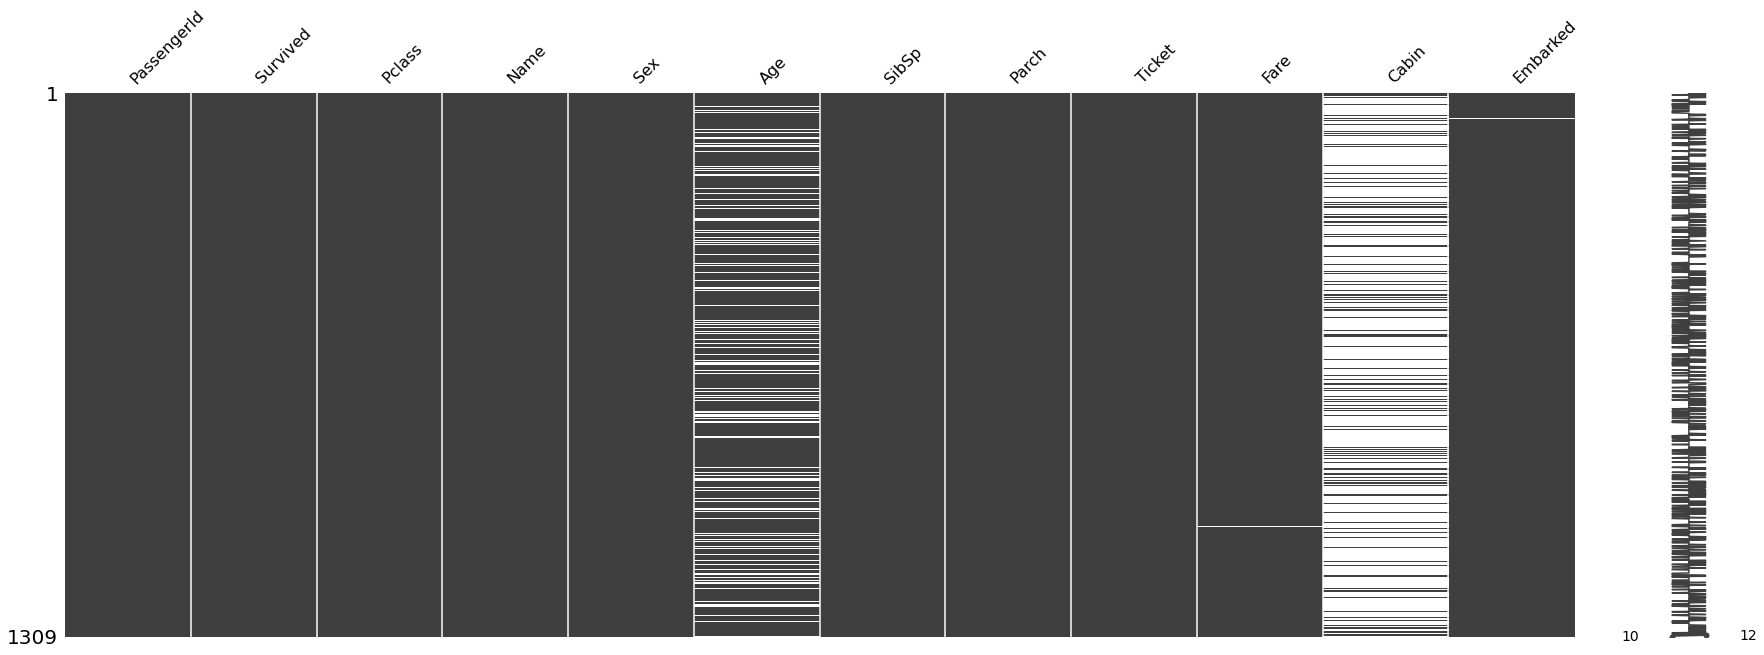

In [ ]:
# check for missing values

import missingno as msg

msg.matrix(df, figsize=(30, 10))

In [ ]:
# replace missing values in Age column with Age mean
df.Age.fillna(df.Age.mean(), inplace=True) 

In [ ]:
# check if Age column has nan values
df.Age.isna().sum()

0

In [ ]:
# Bining Sex column >> male = 0, female = 1

for index in df.index:
  if df.loc[index, 'Sex'] == 'male':
    df.loc[index, 'Sex'] = 0
  elif df.loc[index, 'Sex'] == 'female':
    df.loc[index, 'Sex'] = 1

# check changes
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.25,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,712.833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.925,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1,C123,S
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.05,NaN,S


In [ ]:
# Create new column 'FirstClass' >> 1=Yes, 0=No

df['FirstClass'] = [1 if df.loc[index, 'Pclass'] == 1 else 0 for index in df.index]

df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FirstClass
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.25,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,712.833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.925,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.05,NaN,S,0


In [ ]:
# Create new column 'SecondClass' >> 1=Yes, 0=No

df['SecondClass'] = [1 if df.loc[index, 'Pclass'] == 2 else 0 for index in df.index]

# Features & Labels for Model

In [ ]:
# features >> Sex, Age, FirstClass, SecondClass
features = df[['Sex', 'Age', 'FirstClass', 'SecondClass']]

features.head()

,Sex,Age,FirstClass,SecondClass
0,0,22.0,0,0
1,1,38.0,1,0
2,1,26.0,0,0
3,1,35.0,1,0
4,0,35.0,0,0


In [ ]:
# labels >> Survived
labels = df[['Survived']]

labels.head()

,Survived
0,0
1,1
2,1
3,1
4,0


In [ ]:
# separate data into train and test

from sklearn.model_selection import train_test_split

features_train, features_test, labels_train, labels_test = train_test_split(features, labels, test_size=0.2, random_state=100)


In [ ]:
# Normalize features and labels for Logistic Regression Model

from sklearn.preprocessing import StandardScaler

# initialize scaler 
scaler = StandardScaler()

# features trained in the model
features_train = scaler.fit_transform(features_train)

# features used in test
features_test = scaler.transform(features_test)


# Logistic Regression Model
- Calculate Log Odds >> the probability of a sample belonging to the positive class (passenger survived)
    - odds = P(event occurring) / P(event not occuring)
    - Z = bo + b1x1 + ... + bnXn

- Pass Log Odds to Sigmoid Function >> map Log Odds Z to the range [0, 1]
  - h(Z) = 1 / (1 + exp ** -Z)

In [ ]:
# import module
from sklearn.linear_model import LogisticRegression

# create model
model = LogisticRegression()

In [ ]:
# train data
model.fit(features_train, labels_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
# get coefficients and intercept

coefficients = model.coef_
intercept = model.intercept_

print(f'Intercept: {intercept}')
print(f'Coefficients: {coefficients[0]}')

Intercept: [-0.70922423]
Coefficients: [ 1.67214028 -0.30954568  0.81601974  0.39331614]


In [ ]:
# zip coefficients to their features name

list(zip(['Sex', 'Age', 'FirstClass', 'SecondClass'], coefficients[0]))

[('Sex', 1.672140277547372),
 ('Age', -0.30954567615217715),
 ('FirstClass', 0.8160197428009051),
 ('SecondClass', 0.3933161366876667)]

The Sex of a passenger, with a coefficient of 1.67, and the type of ticket being FirstClass, with a coefficient of 0.81, have the biggest infuence in classifying a passenger as survived (positive class)

In [ ]:
# predict features_test survival
# threshold = 0.5 >> makes the decision on what class the sample belongs to
prediction = model.predict(features_test)
prediction

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1])

In [ ]:
# test labels
survival = np.array(labels_test)
survival.reshape(262, )

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1])

In [ ]:
# model accuracy on training data
train_score = model.score(features_train, labels_train)
print(f'Train Score: {train_score}')

# model accuracy on test data
test_score = model.score(features_test, labels_test)
print(f'Test Score: {test_score}')

Train Score: 0.8500477554918816
Test Score: 0.8740458015267175


The model has an Accuracy of 0.874 on the test data. This means that on average 87.4% of the times the model will correctly classify a new passenger as surviving or perishing in the Titanic 

In [ ]:
# vector of probabilities
probabilities = model.predict_proba(features_test)

print('        Perished   |  Survived   ')
probabilities

        Perished   |  Survived   


array([[0.91898749, 0.08101251],
       [0.94037564, 0.05962436],
       [0.93083228, 0.06916772],
       [0.83268871, 0.16731129],
       [0.91715143, 0.08284857],
       [0.26417113, 0.73582887],
       [0.76219041, 0.23780959],
       [0.92078638, 0.07921362],
       [0.65196495, 0.34803505],
       [0.09625714, 0.90374286],
       [0.80368977, 0.19631023],
       [0.84225922, 0.15774078],
       [0.30902042, 0.69097958],
       [0.93373093, 0.06626907],
       [0.91527759, 0.08472241],
       [0.1276946 , 0.8723054 ],
       [0.84225922, 0.15774078],
       [0.929244  , 0.070756  ],
       [0.929244  , 0.070756  ],
       [0.30321911, 0.69678089],
       [0.04438344, 0.95561656],
       [0.9058425 , 0.0941575 ],
       [0.97434446, 0.02565554],
       [0.30321911, 0.69678089],
       [0.13607666, 0.86392334],
       [0.93373093, 0.06626907],
       [0.93373093, 0.06626907],
       [0.90942339, 0.09057661],
       [0.93373093, 0.06626907],
       [0.93373093, 0.06626907],
       [0.

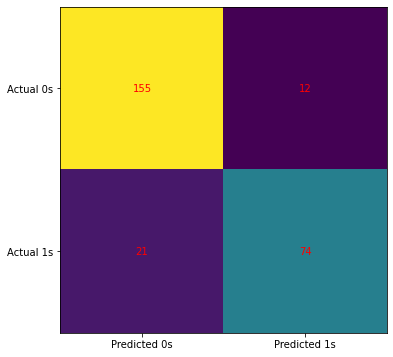

In [ ]:
# confusion matrix

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(labels_test, prediction)

f, ax = plt.subplots(figsize=(6,6))

ax.imshow(cm)
ax.grid(False)

ax.set_xticks([0, 1])
ax.set_xticklabels(['Predicted 0s', 'Predicted 1s'])
ax.set_yticks([0, 1])
ax.set_yticklabels(['Actual 0s', 'Actual 1s'])
ax.set_ylim(1.5, -0.5)

for i in range(2):
  for e in range(2):
    ax.text(e, i, cm[i, e], ha='center', va='center', color='red')

plt.title('Confusion Matrix ')
plt.show()


- True Positives: 74
  - Number of times the model predicted the passenger survived and he survived
- True Negatives: 155
  - Number of times the model predicted the passenger perished and it perished
- False Positives: 12
  - Number of times the model predicted the passenger survived and it perished
- False Negatives: 21
  - Number of times the model predicted the passenger perished and it survived

In [86]:
# Recall >> % of relevant items the classifier found
# true positive / (true positive + false negative)

recall = 74 / (74+21)
print(f'Recall: {recall}')

# Precision >> # of times the model predicted the passenger survived
# true positive / (true positive + false positive)

precision = 74 / (74 + 12)
print(f'Precision: {precision}')



Recall: 0.7789473684210526
Precision: 0.8604651162790697


In [88]:
# F1 Score >> describe the effectiveness of the classifier
# harmonic mean of precision and recall >> 2 * (precision * recall) / (precision + recall)

f1 = 2*(precision * recall) / (precision + recall)
print(f'F1: {f1}')

F1: 0.8176795580110496
